In [1]:
# import packages
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import cm
from matplotlib.ticker import LinearLocator
## set default plot size
plt.rcParams["figure.figsize"] = (10, 7)
## set global font size
plt.rcParams.update({'font.size':14})

import astropy.units as u
from astropy import constants as const

# Basic phase mixing plot

The phase mixing solution satisfies this form of the linearized Vlasov equation that ignores the third term:

$$\frac{\partial \delta f}{\partial t} + \vec{v} \cdot \vec{\nabla} \delta f = 0. $$

In my 9/19 notes with Matt, we discussed how the phase mixing solution corresponds to constant velocity trajectories $r = r_0 + vt$.  Furthermore, the (one-dimensional) solution is:

$$ \delta f_k (v, t) = \delta f_k(v, t=0) \, e^{ikvt} $$

This basically says that, for a fixed position $r$, the potential varies more and more rapidly in $v$ space over time. 

For example, assume that $\delta f_k (r, v, t=0) = F_0 \cos(kr)$. Then:

$$ \delta f_k (r, v, t) = F_0 \cos(k(r - vt)). $$

Below, I plot this example distribution's phase space at different times.

In [2]:
def phase_space_fn(r, v, t, F0=1, k=1):
    '''
    Given a phase space coordinate (r, v), plot the function 
    delta f_k (specified above) at time t.
    
    ARGUMENTS
    ---------
    F0: amplitude of the initial perturbation in f_k 
    r: position
    v: velocity
    t: time
    
    '''

    return F0 * np.cos(k * (r - v*t))

## 3D surface

Source for 3D surface code: https://matplotlib.org/3.4.3/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py

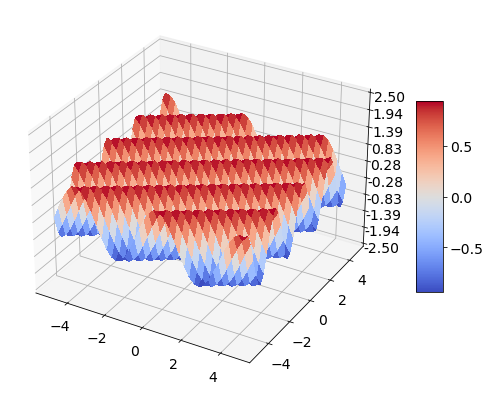

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
t = 1.6 # snapshot in time
rs = np.arange(-5, 5, 0.25)
vs = np.arange(-5, 5, 0.25)
rs, vs = np.meshgrid(rs, vs)
Z = phase_space_fn(rs, vs, t, k=1.5)

# Plot the surface.
surf = ax.plot_surface(rs, vs, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-2.5, 2.5)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=7)

plt.show()

## 2D animation

Below is a plot of phase mixing occuring in phase space.

Source: https://matplotlib.org/3.4.3/gallery/animation/dynamic_image.html#sphx-glr-gallery-animation-dynamic-image-py

In [54]:
# time range
tmin = 0
tmax = 3
tstep = 0.1
ts = np.arange(tmin, tmax, tstep)

# phase space (position vs. velocity) grid
rmin = -5
rmax = 5
vmin = -5
vmax = 5
step = 0.2

rs = np.arange(rmin, rmax, step)
vs = np.arange(vmin, vmax, step)
rs, vs = np.meshgrid(rs, vs)

In [23]:
len(rs)

50

In [37]:
Z = phase_space_fn(rs, vs, 0.)
Z[:,25]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

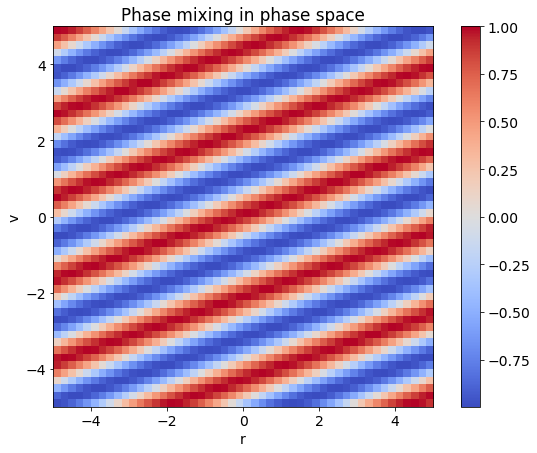

In [39]:
fig, ax = plt.subplots()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

# initialize the color bar
im = ax.imshow(phase_space_fn(rs, vs, t=0), cmap=cm.coolwarm, animated=True)
fig.colorbar(im)
plt.title('Phase mixing in phase space')

# the overdensity at r=0 as a function of time; ie, delta-n(r=0, t)
delta_n_array = []

# make each frame
for t in ts:
    Z = phase_space_fn(rs, vs, t)
    midpoint = (int) (len(rs) / 2) # r = 0 is the "midpoint" of the r domain
    delta_n = np.sum(Z[:, midpoint]) # integrate over v
    delta_n_array.append(delta_n)
    
    im = ax.imshow(Z, cmap=cm.coolwarm, origin='lower', \
                   extent=(rmin, rmax, vmin, vmax), animated=True)
    plt.xlabel('r')
    plt.ylabel('v')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)

# To save the animation, use e.g.
#
ani.save("phase_mixing_temp.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("phase_mixing.mp4", writer=writer)

# plt.show()

Plot the overdensity $\delta n(r=0, t)$. Due to phase mixing, we expect this observable to decay to 0.

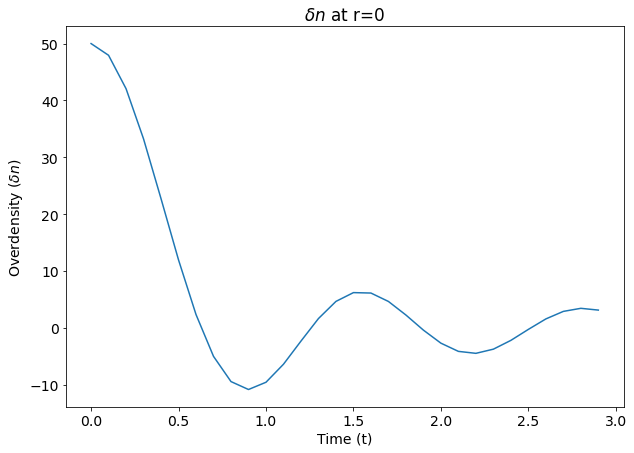

In [55]:
plt.plot(ts, delta_n_array)


plt.xlabel("Time (t)")
plt.ylabel(r"Overdensity ($\delta n$)")
plt.title(r"$\delta n$ at r=0")
plt.show()